# Libraries to be imported
I began by importing the essential libraries: `pandas`, `matplotlib`, and `seaborn`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Iris Dataset
Next, I loaded the Iris dataset from the `seaborn` library and inspected both the first and last five rows.

In [ ]:
iris = sns.load_dataset('iris')

# Displays the first rows of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Display the last rows of the dataset
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Furthermore, I obtained the number of rows and columns in the dataset, as well as the column names.

In [ ]:
# Get the number of variables (columns) and row entries in the Iris dataset
num_rows, num_columns = iris.shape

print(f"Number of rows (entries): {num_rows}")
print(f"Number of variables (columns): {num_columns}")

# Get the column names of the Iris dataset
print(iris.columns)



Number of rows (entries): 150
Number of variables (columns): 5
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


**Interpretation**

The dataset has **5 columns**, namely `sepal_length`, `sepal_width`, `petal_length`, `petal_width` and `species`.

Hence a total of **150 row entries**.

# Initial Exploration
## Missing Values Exploration

Checked the dataset for any missing entries using the `.isnull()` function.

In [ ]:
# Check for missing values
missing_values = iris.isnull().sum()
missing_values


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There are no missing values in this dataset. We can visualise this in

---

a heatmap as follows, for a more intuitive understanding:

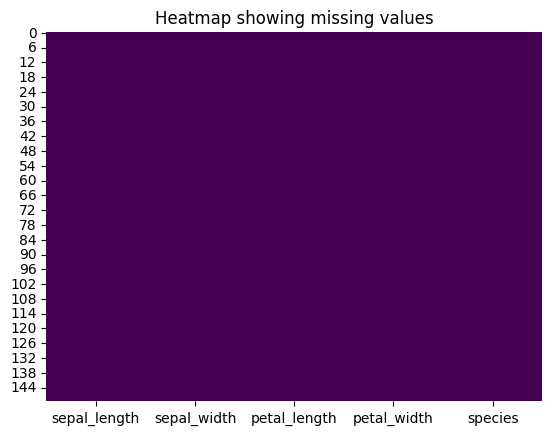

In [ ]:
# Visualizing missing data using seaborn heatmap
sns.heatmap(iris.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap showing missing values")
plt.show()


The visualisation confirms that there are no missing values.

## Description of Data Types of Attributes
I checked for the datatypes of the variables, to determine the categorical and numeric variables.

In [ ]:
# Checking the data type of all columns in the Iris dataset
print(iris.dtypes)


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


**Interpretation**

The first four variables - `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, are of the float data type, thus they are **numeric variables**.

The `species` variable is of the object datatype, and thus is a **categorical variable**.

## Description of Summary Statistics
Thirdly, I explored the summary statistics for the four numeric variables, using the `.describe()` function.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Interpretation**

The count of 150 for each feature confirms that there are no missing values.

The mean values indicate that sepal length averages 5.84 cm, sepal width 3.06 cm, petal length 3.76 cm, and petal width 1.19 cm, showing that petal dimensions are generally smaller than sepal dimensions. The standard deviations are relatively low for all features, with petal length (1.76) exhibiting the most variation, suggesting greater diversity in petal lengths across samples compared to sepal width, which shows the least variation (0.44).

The minimum, maximum, and quartile values provide additional details on the range and distribution of each feature in the dataset.

## Exploring the Values
Finally, I gathered a summary of the unique entries in the categorical variable, `species`.

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The `species` column has the unique entries of `setosa`, `virginica` and `versicolor`.

# Univariate Analysis
In this step, we examine the distribution of individual variables by visualizing each feature to gain insight into its distribution.

## Histogram to show continuous variables
I employed a histogram to visualize the distribution of the numerical variables.

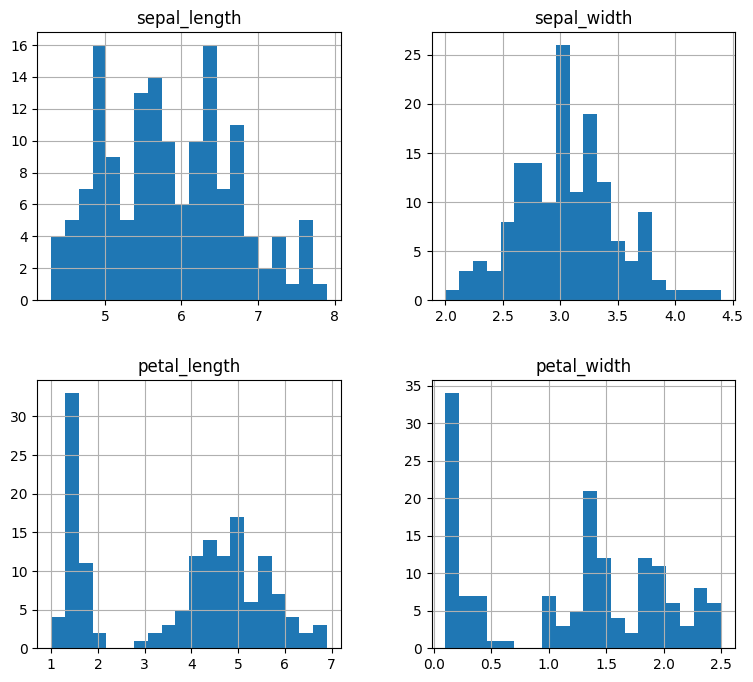

In [ ]:
iris.hist(figsize=(9, 8), bins=20)
plt.show()


**Interpretation**

**Sepal Length:** The distribution appears slightly bimodal, with peaks around 5.0 cm and 6.3 cm. Values range from 4.5 cm to 8 cm, with a few outliers above 7.5 cm.

**Sepal Width:** The distribution is more symmetric, featuring a prominent peak around 3.0 cm. Data ranges from approximately 2.0 cm to 4.5 cm, with a slightly extended left tail, indicating a skew towards smaller widths.

**Petal Length:** This feature exhibits a multimodal distribution, with distinct peaks at around 1.5 cm and 5.0 cm. This suggests the presence of two distinct groups within the dataset, highlighting considerable variation in petal length between species.

**Petal Width:** Similarly multimodal, this feature has a significant concentration of values around 0.2 cm and another cluster around 1.5 cm. The distribution indicates that petal width varies widely depending on the species, with a tendency towards smaller values.

## KDE Plots
I then utilized a Kernel Density Estimate (KDE) plot to further visualize the distribution of the variables, offering a smoothed representation of the histogram.

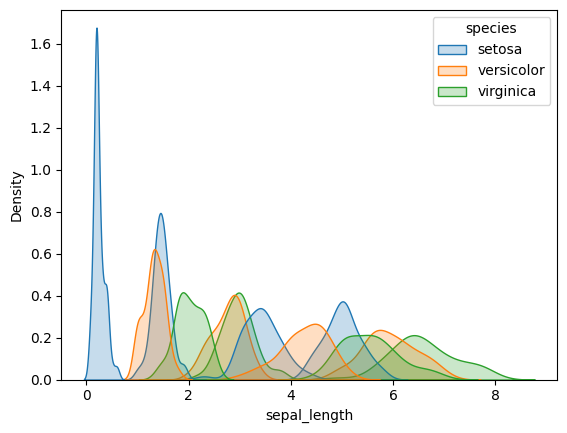

In [ ]:
sns.kdeplot(data=iris, x="sepal_length", hue="species", fill=True)
sns.kdeplot(data=iris, x="sepal_width", hue="species", fill=True)
sns.kdeplot(data=iris, x="petal_length", hue="species", fill=True)
sns.kdeplot(data=iris, x="petal_width", hue="species", fill=True)
plt.show()


**Interpretation**

Setosa is the easiest species to differentiate, characterized by its smaller petal size.

Versicolor and Virginica exhibit significant overlap, particularly in sepal dimensions, though Virginica generally has larger petals, providing some distinction between the two.

Petal dimensions (length and width) provide the most effective separation, especially between Setosa and the other species.

# Bivariate Analysis
Next, we examine the relationships between two variables to uncover potential correlations and patterns.

## Scatterplots

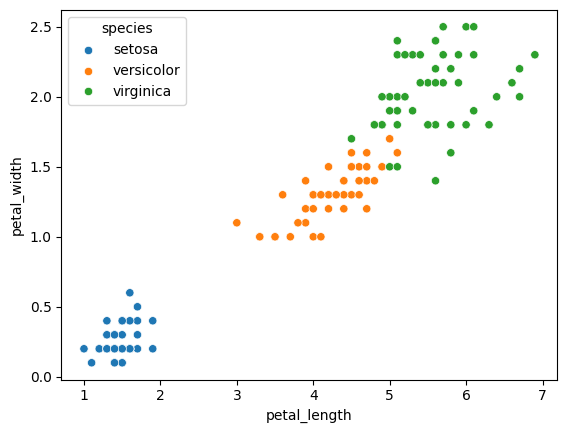

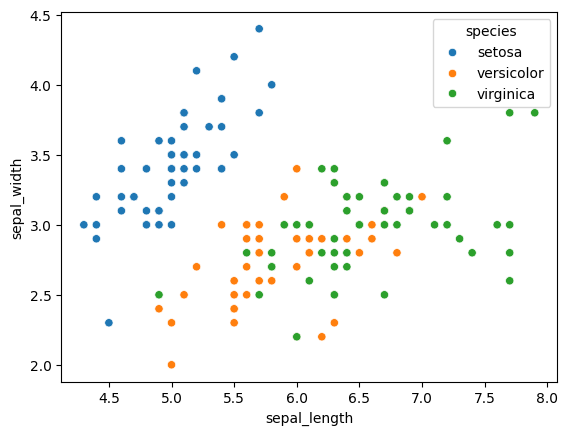

In [ ]:
# Scatterplot of petal length vs petal width
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

# Scatterplot of sepal length vs sepal width
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()


**Interpretation**

In the first scatterplot (petal length vs. petal width), there is a clear distinction among the three Iris species. **Setosa** forms a compact, distinct cluster in the lower-left corner, with very small petal lengths and widths, making it easily distinguishable from the other species. **Versicolor** occupies the middle range of values, while **Virginica** has the largest petal dimensions. Both Versicolor and Virginica show a strong positive correlation between petal length and petal width, indicating that as petal length increases, petal width grows proportionally. In contrast, Setosa’s data points are tightly grouped with small, relatively uniform values.

In the second scatterplot (sepal length vs. sepal width), the separation between species is less clear. **Setosa** still forms a distinct group, characterized by larger sepal widths compared to the other two species. However, **Versicolor** and **Virginica** overlap significantly, particularly in terms of sepal length. Although there is a weak positive correlation between sepal length and width, these features are less effective at distinguishing Versicolor from Virginica compared to the petal dimensions.

## Correlation Heatmap


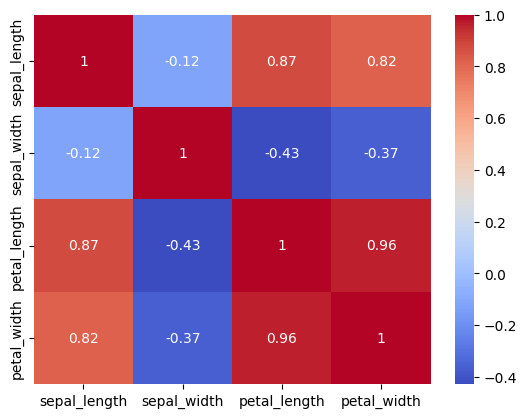

In [ ]:
corr_matrix = iris.drop('species', axis=1).corr()

# Plot the heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



**Interpretation**

The heatmap reveals strong positive correlations between **petal length and petal width** (0.96) and between **sepal length and petal length** (0.87), indicating that larger flowers generally have longer and wider petals. In contrast, **sepal width** shows weak negative correlations with both petal length (-0.43) and petal width (-0.37), and almost no correlation with sepal length (-0.12), suggesting it behaves more independently. Overall, petal dimensions exhibit stronger correlations and are likely more useful for distinguishing species.

#Multivariate Analysis
We will then examine the relationships between multiple variables at the same time.


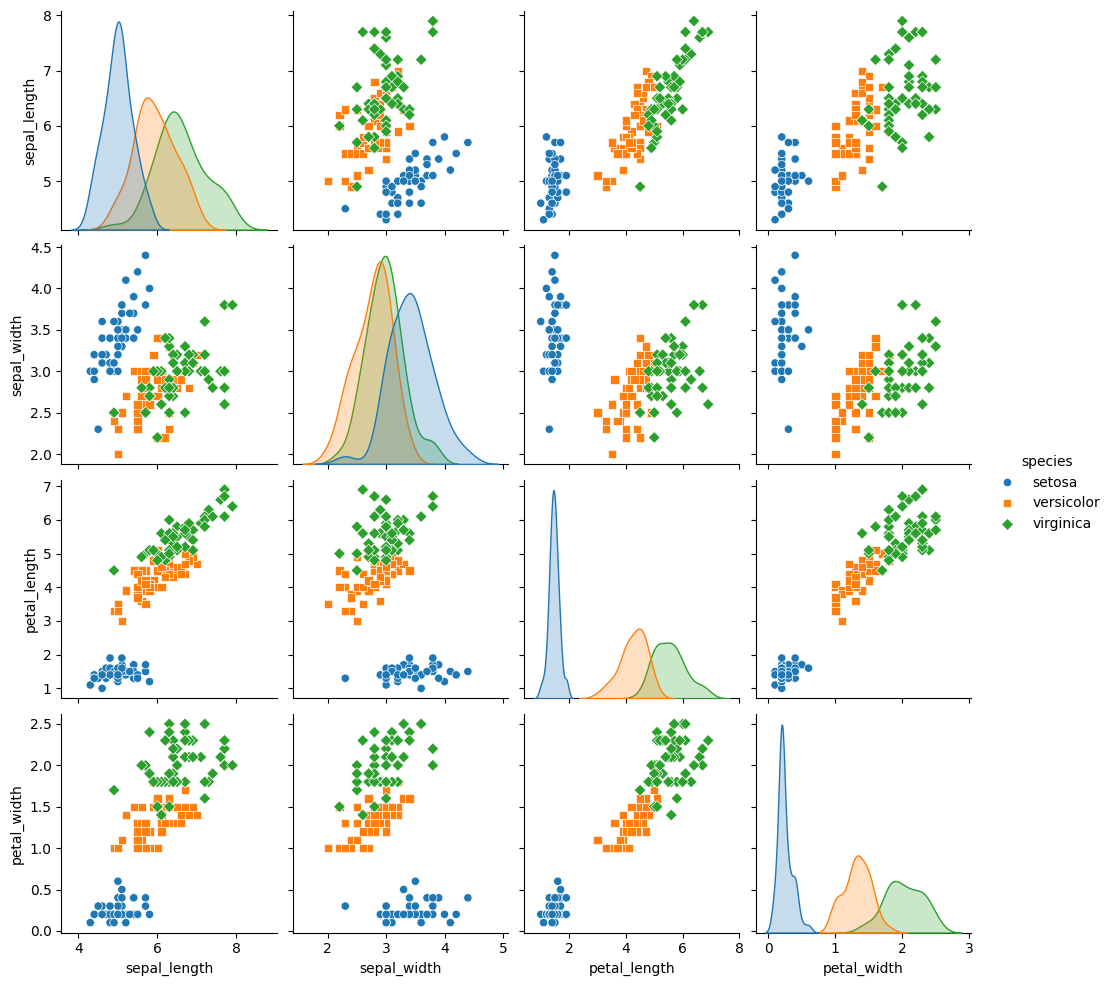

In [ ]:
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.show()


**Interpretation**

Setosa (represented by blue circles) stands out distinctly from the other two species across most feature combinations. In particular, the petal length and width show clear separation, with Setosa having much smaller values for both, making it easily identifiable based on these features.

Versicolor (orange squares) and Virginica (green diamonds), on the other hand, overlap in several feature pairs, especially regarding sepal dimensions (sepal length vs. sepal width). However, they are more distinguishable by petal-related features (petal length vs. petal width), with Virginica generally having larger petal sizes.

Linear Relationships: There is a strong positive correlation between petal length and petal width for Versicolor and Virginica, indicating that as one increases, the other tends to follow. This trend is less pronounced for Setosa due to its smaller and more compact petal measurements.
Sepal Width: Sepal width is less useful for differentiating species, as there is significant overlap among all three, particularly between Versicolor and Virginica.

In conclusion, petal dimensions are more effective than sepal dimensions for distinguishing the three Iris species, particularly when separating Setosa from the other two. While Versicolor and Virginica show more overlap, they can still be partially differentiated by their petal size.